In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import numpy as np
import pandas as pd

import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import utils

plt.style.use('default')

c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\david\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\david\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\david\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\programdata\anaconda3\envs\tensorflow-gpu\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "c:\programdata\anaconda3\envs\tensorflow-gpu\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/fc/c7/23388a5d37e070e636518af3063cb9da03ac7dc8811fd92270f5bac5c868/pandas-0.24.1-cp35-cp35m-win_amd64.whl


tensorflow-gpu 1.12.0 requires keras-applications>=1.0.6, which is not installed.
tensorflow-gpu 1.12.0 requires keras-preprocessing>=1.0.5, which is not installed.
tensorflow-gpu 1.12.0 has requirement protobuf>=3.6.1, but you'll have protobuf 3.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

NameError: name 'keras' is not defined

In [10]:
TOP_N_WORDS = 5000
OUTPUT_CLASSES = 2
NODE_LIST =  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
LAYER_LIST = [1, 2, 3, 4,  5,  6,  7,   8,   9,  10]

node_list =  [2,2]
layer_list = [1,2]

dataset = 'imdb'
save_path = 'D:/data/vca/outputs/saved_models'

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=TOP_N_WORDS)

val_acc = np.zeros(shape=(len(node_list),len(layer_list)))
test_acc = np.zeros(shape=(len(node_list),len(layer_list)))
for i,node in enumerate(node_list):
    for ii,layer in enumerate(layer_list):
        print(node, layer)
        val_hist, test_hist = myModel(nodes=node,
                                      hidden_layers=layer,
                                      inputs=TOP_N_WORDS,
                                      outputs=OUTPUT_CLASSES,
                                      verbose=1,
                                      save_path=save_path)
        print(test_hist)
        val_acc[i,ii] = np.max(val_hist.history['val_acc'])
        test_acc[i,ii] = test_hist[1]

df_val = pd.DataFrame(test_acc)
df_val.columns = layer_list
df_val.index = node_list
model_desc = str(TOP_N_WORDS) + '_layers_' + str(df_val.columns.values) + '_nodes_' + str(df_val.index.values)
df_val.to_csv(save_path + '/{}/val_acc_{}'.format(dataset, model_desc))

df_test = pd.DataFrame(test_acc)
df_test.columns = layer_list
df_test.index = node_list
model_desc = str(TOP_N_WORDS) + '_layers_' + str(df_test.columns.values) + '_nodes_' + str(df_test.index.values)
df_test.to_csv(save_path + '/{}/test_acc_{}'.format(dataset, model_desc))

1 1
Train on 24000 samples, validate on 1000 samples
Epoch 1/3
24000/24000 [==============================] - 3s 126us/step - loss: 0.6224 - acc: 0.6849 - val_loss: 0.5695 - val_acc: 0.7750
Epoch 2/3
24000/24000 [==============================] - 2s 93us/step - loss: 0.5265 - acc: 0.8143 - val_loss: 0.5085 - val_acc: 0.8580
Epoch 3/3
25000/25000 [==============================] - 3s 115us/step
[0.4723606953525543, 0.85704]
1 2
Train on 24000 samples, validate on 1000 samples
Epoch 1/3
24000/24000 [==============================] - 3s 114us/step - loss: 0.6932 - acc: 0.4959 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 2/3
24000/24000 [==============================] - 2s 95us/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 3/3
25000/25000 [==============================] - 2s 93us/step
[0.6931471960449219, 0.5]
1 3
Train on 24000 samples, validate on 1000 samples
Epoch 1/3
24000/24000 [==============================] - 3s 119us/step - loss: 0.6932 - acc: 0.496

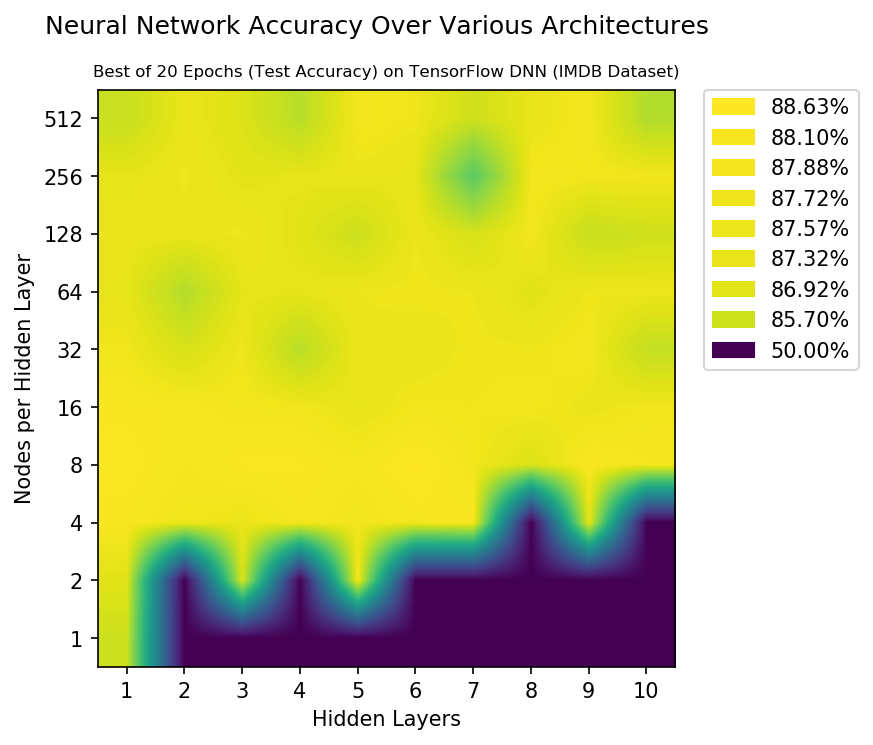

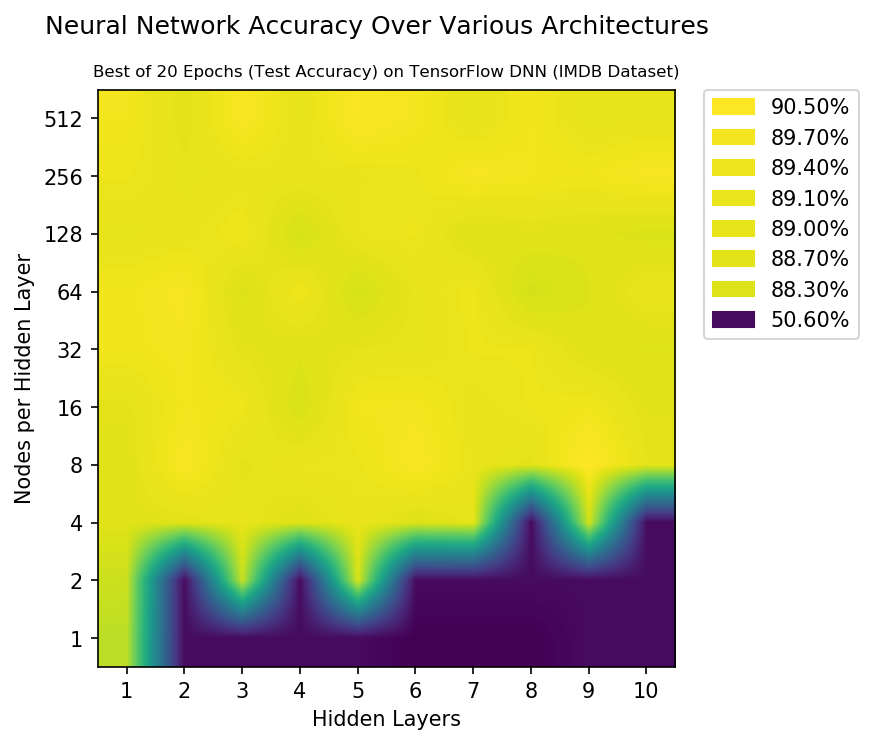

In [21]:
def plot_results(df):
    matrix = np.array(df)
    plt.figure(figsize=(5,5), dpi=150)
    plt.suptitle('Neural Network Accuracy Over Various Architectures', fontsize=12)
    plt.title('Best of 20 Epochs (Test Accuracy) on TensorFlow DNN (IMDB Dataset)', fontsize=8)
    im = plt.imshow(np.flip(matrix,0), interpolation='bilinear')
    plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[1,2,4,8,16,32,64,128,256,512][::-1])
    plt.ylabel("Nodes per Hidden Layer")
    plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
    plt.xlabel('Hidden Layers')

    values = np.unique(matrix)
    colors = [im.cmap(im.norm(value)) for value in values]
    patches = [mpatches.Patch(color=colors[i], label="{l:.2%}".format(l=values[i]) ) for i in range(len(values))]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches[::-10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

    plt.show()
    
plot_results(test_acc)
plot_results(val_acc)

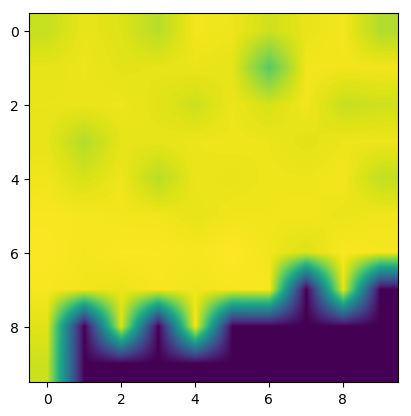

In [16]:
matrix = np.array(test_acc)
im = plt.imshow(np.flip(matrix,0), interpolation='bilinear')

values = np.unique(matrix)
colors = [im.cmap(im.norm(value)) for value in values]
[mpatches.Patch(color=colors[i], label="{l:.2%}".format(l=values[i]) ) for i in range(len(values))]